In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('/content/emails.csv') 

# Prepare features and labels
X = data.iloc[:, 1:-1]  # All columns except 'Email No.' and 'Prediction'
y = data['Prediction']  # 'Prediction' column

# Check for missing values
print("Missing values in dataset:\n", data.isnull().sum().sum())

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling for better SVM performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Missing values in dataset:
 0


In [3]:
from sklearn.svm import SVC

# Initialize the SVM model
svm_model = SVC(kernel='linear', C=1.0, random_state=42)  # You can adjust C, kernel, and other parameters

# Train the model
svm_model.fit(X_train, y_train)


SVC(kernel='linear', random_state=42)

Accuracy: 94.69%
Classification Report:
              precision    recall  f1-score   support

    Not Spam       0.97      0.96      0.96       739
        Spam       0.90      0.92      0.91       296

    accuracy                           0.95      1035
   macro avg       0.93      0.94      0.94      1035
weighted avg       0.95      0.95      0.95      1035



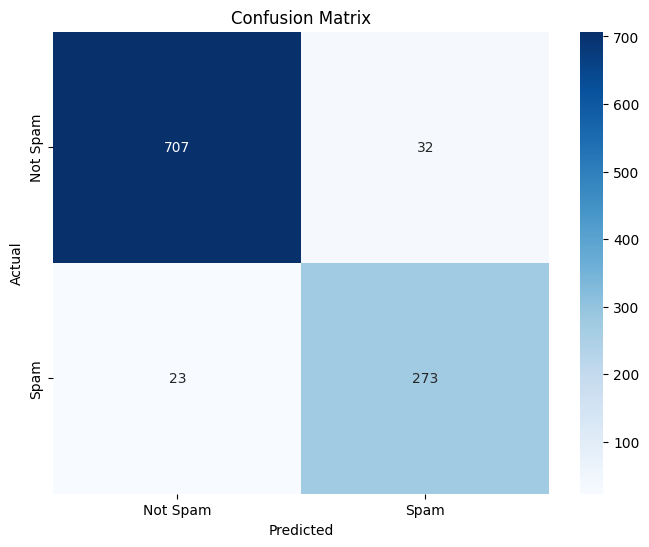

In [4]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=['Not Spam', 'Spam']))

# Generate and plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [5]:
import re
import numpy as np

def preprocess_text(text):
    """Preprocess the email text by removing special characters and tokenizing."""
    text = re.sub(r'[^a-zA-Z\s]', '', text).lower()
    words = text.split()
    return words

def generate_word_count_vector(email_words, common_words):
    """Generate a word count vector for the email."""
    word_count_vector = [0] * len(common_words)
    for word in email_words:
        if word in common_words:
            index = common_words.index(word)
            word_count_vector[index] += 1
    return word_count_vector

# Example real email text for testing
email_text = """
Upgrade suggested: Aseel, your account is out of storage space
Inbox

Dropbox <no-reply@dropbox.com> Unsubscribe
Fri, 9 Aug, 2023, 10:45 AM
to me

Dropbox
Hi Aseel,

Please consider adding more storage.

Your Dropbox is full and is no longer syncing files. New files won't be backed up online.

Click here to view your options

"""
# Preprocess the email
email_words = preprocess_text(email_text)

# Use the feature list from your training data
most_common_words = list(data.columns[1:-1])  

# Create the word count vector for the email
email_vector = generate_word_count_vector(email_words, most_common_words)

# Ensure the email_vector is a numpy array with the correct shape
email_vector = np.array(email_vector).reshape(1, -1)

# Standardize the feature vector using the same scaler
email_vector = scaler.transform(email_vector)

# Predict with the model
email_prediction = svm_model.predict(email_vector)

# Use if-else to print the classification result
if email_prediction[0] == 0:
    print('This is not a spam mail')
else:
    print('This is a spam mail')


This is not a spam mail


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [10]:
import re
import numpy as np

def preprocess_text(text):
    """Preprocess the email text by removing special characters and tokenizing."""
    text = re.sub(r'[^a-zA-Z\s]', '', text).lower()
    words = text.split()
    return words

def generate_word_count_vector(email_words, common_words):
    """Generate a word count vector for the email."""
    word_count_vector = [0] * len(common_words)
    for word in email_words:
        if word in common_words:
            index = common_words.index(word)
            word_count_vector[index] += 1
    return word_count_vector

# Example real email text for testing
email_text = """
Your account has been locked.
А8426887620
Someone is attempting to sign-in to your account.
• When: Mon, June 10, 2023
• Device: Apple iPhone iOS
• Near: New Jersey, United States
Our system automatically lock your account until you confirm this action.
If this was you, click here to approve and the system will automatically unlock your account & you can sign-in again.
If you didn't request this sign-in: click here to deny and follow the instruction to unlock your account.
Regards,
Amazon Customer Service
"""

# Preprocess the email
email_words = preprocess_text(email_text)

# Use the feature list from your training data
most_common_words = list(data.columns[1:-1])  

# Create the word count vector for the email
email_vector = generate_word_count_vector(email_words, most_common_words)

# Ensure the email_vector is a numpy array with the correct shape
email_vector = np.array(email_vector).reshape(1, -1)

# Standardize the feature vector using the same scaler
email_vector = scaler.transform(email_vector)

# Predict with the model
email_prediction = svm_model.predict(email_vector)

# Use if-else to print the classification result
if email_prediction[0] == 0:
    print('This is not a spam mail')
else:
    print('This is a spam mail')


This is a spam mail


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [11]:
import pickle

# Save the model to a file
with open('svm_spam_classifier.pkl', 'wb') as model_file:
    pickle.dump(svm_model, model_file)

# Save the most common words to a file
with open('most_common_words.pkl', 'wb') as words_file:
    pickle.dump(most_common_words, words_file)

# Save the fitted scaler
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

print("Model and feature list saved successfully!")


Model and feature list saved successfully!
